In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from lightgbm import LGBMModel, LGBMClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
#from sklearn.model_selection  import cross_val_score, StratifiedKFold
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
param = {
    'num_leaves':48,
    'min_data_in_leaf':1,
    #'num_iterations':1000,
    'learning_rate':0.01,
    'objective':'binary',
    #'objective':'regression_l2',
    'boosting':'gbdt',
    'num_threads':16,
    'device_type':'cpu',
    'max_depth':-1,
    #'valid_init_score':0.5
}

In [3]:
y = pd.read_csv("../input/train_numeric.csv", index_col=0, usecols=[0,969])

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


前回の特徴量indexだけ

In [4]:
important_indices_num = np.array([  0,   1,   2,   3,   6,   7,   8,   9,  10,  12,  13,  14,  15,
        18,  20,  24,  25,  26,  27,  30,  31,  32,  33,  34,  37,  38,
        39,  42,  45,  47,  48,  50,  53,  54,  57,  59,  60,  61,  62,
        63,  64,  65,  68,  69,  70,  71,  74,  76,  79,  81,  84,  89,
        90,  93,  97,  98, 102, 105, 108, 111, 112, 114, 115, 122, 126,
       127, 134, 136, 142, 149, 150, 151, 152, 162, 163, 164, 166, 167,
       168, 170, 186, 197, 203, 207, 213, 219, 221, 248, 251, 252, 256,
       257, 258, 266, 267, 279, 287, 299, 308, 313, 324, 325, 327, 330,
       331, 334, 337, 338, 345, 346, 350, 352, 357, 358, 359, 360, 367,
       369, 371, 373, 375, 376, 378, 379, 380, 392, 393, 394, 396, 397,
       398, 400, 419, 421, 423, 459, 473, 479, 480, 498, 501, 504, 521,
       551, 571, 582, 583, 612, 613, 623, 624, 628, 655, 666, 681, 687,
       688, 690, 691, 692, 693, 696, 698, 701, 702, 703, 704, 707, 710,
       714, 715, 718, 720, 721, 724, 725, 726, 727, 728, 729, 731, 732,
       733, 734, 735, 737, 741, 751, 757, 758, 765, 769, 771, 774, 775,
       776, 778, 780, 782, 784, 786, 788, 790, 792, 798, 799, 803, 805,
       810, 811, 814, 815, 818, 819, 822, 826, 827, 828, 829, 831, 832,
       836, 838, 839, 843, 844, 848, 849, 850, 851, 854, 855, 858, 865,
       872, 878, 884, 885, 902, 908, 926, 933, 951, 956])

In [5]:
important_indices_cat = np.array([1054, 1055])

In [6]:
important_indices_num_dup = np.array([0, 1])

In [47]:
dfs =[]

In [48]:
dfs.append(pd.read_csv('../input/train_numeric.csv', index_col='Id', usecols=np.concatenate([[0], important_indices_num + 1])))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [49]:
dfs.append(pd.read_csv("../feat/train_cat_int.csv", index_col='Id', usecols=np.concatenate([[0], important_indices_cat + 1])).add_prefix('m_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [50]:
dfs.append(pd.read_csv("../feat/train_num_dup_row.csv", index_col='Id').add_prefix('m_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [51]:
dfs.append(pd.read_csv("../feat/nyanp/train_adj_failed.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [52]:
dfs.append(pd.read_csv("../feat/nyanp/train_adj_failed_t.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [53]:
dfs.append(pd.read_csv("../feat/nyanp/train_diff2adj.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [54]:
dfs.append(pd.read_csv("../feat/nyanp/train_mean_num.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [55]:
dfs.append(pd.read_csv("../feat/nyanp/train_time_diff.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [56]:
df = pd.read_csv("../feat/sonesuke/sonesuke_train.csv", index_col='id')
df.index.name = 'Id'
dfs.append(df.add_prefix('s_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [57]:
dfs.append(pd.read_csv("../feat/kitagawa/train_StationPathInfo.csv", index_col='Id').add_prefix('k_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [58]:
dfs.append(pd.read_csv("../feat/yodoken/train_pass_cluster.csv", index_col='Id').add_prefix('y_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [59]:
df = pd.read_csv("../feat/train_mt_0714.csv", header=None).add_prefix('mt')
df['Id'] = dfs[0].index
df = df.set_index('Id')
dfs.append(df.add_prefix('m_'))

In [60]:
for i in range(0,len(dfs)):
    dfs[i].index = dfs[i].index.astype(int)
    print(dfs[i].index.duplicated().sum())

0
0
0
0
0
0
0
0
0
0
0
0


X結合

In [61]:
X = pd.concat(dfs, axis=1)

テストデータ

In [62]:
dfs_test = []

In [63]:
dfs_test.append(pd.read_csv('../input/test_numeric.csv', index_col='Id', usecols=np.concatenate([[0], important_indices_num + 1])))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [64]:
dfs_test.append(pd.read_csv("../feat/test_cat_int.csv", index_col='Id', usecols=np.concatenate([[0], important_indices_cat + 1])).add_prefix('m_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [65]:
dfs_test.append(pd.read_csv("../feat/test_num_dup_row.csv", index_col='Id').add_prefix('m_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [66]:
dfs_test.append(pd.read_csv("../feat/nyanp/test_adj_failed.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [67]:
dfs_test.append(pd.read_csv("../feat/nyanp/test_adj_failed_t.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [68]:
dfs_test.append(pd.read_csv("../feat/nyanp/test_diff2adj.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [69]:
dfs_test.append(pd.read_csv("../feat/nyanp/test_mean_num.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [70]:
dfs_test.append(pd.read_csv("../feat/nyanp/test_time_diff.csv", index_col='Id').add_prefix('n_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [71]:
df = pd.read_csv("../feat/sonesuke/sonesuke_test.csv", index_col='id')
df.index.name = 'Id'
dfs_test.append(df.add_prefix('s_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [72]:
dfs_test.append(pd.read_csv("../feat/kitagawa/test_StationPathInfo.csv", index_col='Id').add_prefix('k_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [73]:
dfs_test.append(pd.read_csv("../feat/yodoken/test_pass_cluster.csv", index_col='Id').add_prefix('y_'))

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [74]:
df = pd.read_csv("../feat/test_mt_0714.csv", header=None).add_prefix('mt')
df['Id'] = dfs_test[0].index
df = df.set_index('Id')
dfs_test.append(df.add_prefix('m_'))

In [75]:
for i in range(0,len(dfs_test)):
    dfs_test[i].index = dfs_test[i].index.astype(int)
    print(dfs_test[i].index.duplicated().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [76]:
X_test = pd.concat(dfs_test, axis=1)

In [77]:
del dfs

In [78]:
del dfs_test

In [37]:
y_train = y.astype(np.float32).values.ravel()

In [79]:
%%time
n_folds=5

cv = StratifiedKFold(y_train, n_folds)
models = []
preds_oof  = np.ones(y_train.shape[0])
preds_test = np.empty((n_folds, X_test.shape[0]))

for i, (train, valid) in enumerate(cv):
    train_data = lgb.Dataset(X.iloc[train], y_train[train])
    test_data = lgb.Dataset(X.iloc[valid], y_train[valid])

    model = lgb.train(param, train_data, 1000, early_stopping_rounds=50, valid_sets=[test_data])
    
    preds_oof[valid] = model.predict(X.iloc[valid])
    preds_test[i, :] = model.predict(X_test)

    models.append(model)


[1]	valid_0's binary_logloss: 0.0333024
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.0325095
[3]	valid_0's binary_logloss: 0.0319037
[4]	valid_0's binary_logloss: 0.0314187
[5]	valid_0's binary_logloss: 0.0310144
[6]	valid_0's binary_logloss: 0.0306495
[7]	valid_0's binary_logloss: 0.0303215
[8]	valid_0's binary_logloss: 0.0300285
[9]	valid_0's binary_logloss: 0.0297444
[10]	valid_0's binary_logloss: 0.0294661
[11]	valid_0's binary_logloss: 0.02922
[12]	valid_0's binary_logloss: 0.0289949
[13]	valid_0's binary_logloss: 0.0287685
[14]	valid_0's binary_logloss: 0.0285739
[15]	valid_0's binary_logloss: 0.0283867
[16]	valid_0's binary_logloss: 0.0282205
[17]	valid_0's binary_logloss: 0.0280569
[18]	valid_0's binary_logloss: 0.0278978
[19]	valid_0's binary_logloss: 0.0277498
[20]	valid_0's binary_logloss: 0.0276011
[21]	valid_0's binary_logloss: 0.0274619
[22]	valid_0's binary_logloss: 0.0273325
[23]	valid_0's binary_logloss: 0.0272036
[24]	v

[198]	valid_0's binary_logloss: 0.0223556
[199]	valid_0's binary_logloss: 0.0223494
[200]	valid_0's binary_logloss: 0.0223467
[201]	valid_0's binary_logloss: 0.0223405
[202]	valid_0's binary_logloss: 0.0223363
[203]	valid_0's binary_logloss: 0.0223304
[204]	valid_0's binary_logloss: 0.0223273
[205]	valid_0's binary_logloss: 0.0223225
[206]	valid_0's binary_logloss: 0.0223207
[207]	valid_0's binary_logloss: 0.0223229
[208]	valid_0's binary_logloss: 0.0223216
[209]	valid_0's binary_logloss: 0.0223189
[210]	valid_0's binary_logloss: 0.0223168
[211]	valid_0's binary_logloss: 0.0223133
[212]	valid_0's binary_logloss: 0.0223183
[213]	valid_0's binary_logloss: 0.0223143
[214]	valid_0's binary_logloss: 0.0223162
[215]	valid_0's binary_logloss: 0.0223271
[216]	valid_0's binary_logloss: 0.0223235
[217]	valid_0's binary_logloss: 0.0223217
[218]	valid_0's binary_logloss: 0.022319
[219]	valid_0's binary_logloss: 0.0223141
[220]	valid_0's binary_logloss: 0.0223102
[221]	valid_0's binary_logloss: 0.0

[106]	valid_0's binary_logloss: 0.0228945
[107]	valid_0's binary_logloss: 0.0228755
[108]	valid_0's binary_logloss: 0.0228574
[109]	valid_0's binary_logloss: 0.0228421
[110]	valid_0's binary_logloss: 0.0228242
[111]	valid_0's binary_logloss: 0.0228058
[112]	valid_0's binary_logloss: 0.0227883
[113]	valid_0's binary_logloss: 0.0227726
[114]	valid_0's binary_logloss: 0.0227569
[115]	valid_0's binary_logloss: 0.0227418
[116]	valid_0's binary_logloss: 0.022724
[117]	valid_0's binary_logloss: 0.0227062
[118]	valid_0's binary_logloss: 0.0226917
[119]	valid_0's binary_logloss: 0.0226791
[120]	valid_0's binary_logloss: 0.0226621
[121]	valid_0's binary_logloss: 0.0226452
[122]	valid_0's binary_logloss: 0.0226309
[123]	valid_0's binary_logloss: 0.0226223
[124]	valid_0's binary_logloss: 0.0226095
[125]	valid_0's binary_logloss: 0.0225978
[126]	valid_0's binary_logloss: 0.0225849
[127]	valid_0's binary_logloss: 0.0225702
[128]	valid_0's binary_logloss: 0.0225612
[129]	valid_0's binary_logloss: 0.0

[9]	valid_0's binary_logloss: 0.0298944
[10]	valid_0's binary_logloss: 0.0296419
[11]	valid_0's binary_logloss: 0.0293948
[12]	valid_0's binary_logloss: 0.0291678
[13]	valid_0's binary_logloss: 0.0289635
[14]	valid_0's binary_logloss: 0.0287682
[15]	valid_0's binary_logloss: 0.0285856
[16]	valid_0's binary_logloss: 0.0284145
[17]	valid_0's binary_logloss: 0.0282431
[18]	valid_0's binary_logloss: 0.0280804
[19]	valid_0's binary_logloss: 0.0279279
[20]	valid_0's binary_logloss: 0.0277651
[21]	valid_0's binary_logloss: 0.0276268
[22]	valid_0's binary_logloss: 0.0274901
[23]	valid_0's binary_logloss: 0.0273598
[24]	valid_0's binary_logloss: 0.027235
[25]	valid_0's binary_logloss: 0.027119
[26]	valid_0's binary_logloss: 0.027012
[27]	valid_0's binary_logloss: 0.0269005
[28]	valid_0's binary_logloss: 0.0267944
[29]	valid_0's binary_logloss: 0.0266884
[30]	valid_0's binary_logloss: 0.0265879
[31]	valid_0's binary_logloss: 0.026485
[32]	valid_0's binary_logloss: 0.0263837
[33]	valid_0's binary

[207]	valid_0's binary_logloss: 0.0223336
[208]	valid_0's binary_logloss: 0.0223474
[209]	valid_0's binary_logloss: 0.0223414
[210]	valid_0's binary_logloss: 0.0223358
[211]	valid_0's binary_logloss: 0.0223363
[212]	valid_0's binary_logloss: 0.0223309
[213]	valid_0's binary_logloss: 0.0223295
[214]	valid_0's binary_logloss: 0.022325
[215]	valid_0's binary_logloss: 0.0223299
[216]	valid_0's binary_logloss: 0.0223255
[217]	valid_0's binary_logloss: 0.0223209
[218]	valid_0's binary_logloss: 0.0223154
[219]	valid_0's binary_logloss: 0.0223152
[220]	valid_0's binary_logloss: 0.0223136
[221]	valid_0's binary_logloss: 0.0223349
[222]	valid_0's binary_logloss: 0.0223312
[223]	valid_0's binary_logloss: 0.0223279
[224]	valid_0's binary_logloss: 0.0223269
[225]	valid_0's binary_logloss: 0.0223227
[226]	valid_0's binary_logloss: 0.0223187
[227]	valid_0's binary_logloss: 0.0223165
[228]	valid_0's binary_logloss: 0.0223163
[229]	valid_0's binary_logloss: 0.0223127
[230]	valid_0's binary_logloss: 0.0

[100]	valid_0's binary_logloss: 0.0239256
[101]	valid_0's binary_logloss: 0.0239062
[102]	valid_0's binary_logloss: 0.0238865
[103]	valid_0's binary_logloss: 0.0238686
[104]	valid_0's binary_logloss: 0.0238498
[105]	valid_0's binary_logloss: 0.0238333
[106]	valid_0's binary_logloss: 0.0238176
[107]	valid_0's binary_logloss: 0.023801
[108]	valid_0's binary_logloss: 0.0237846
[109]	valid_0's binary_logloss: 0.0237662
[110]	valid_0's binary_logloss: 0.0237556
[111]	valid_0's binary_logloss: 0.0237416
[112]	valid_0's binary_logloss: 0.0237271
[113]	valid_0's binary_logloss: 0.0237127
[114]	valid_0's binary_logloss: 0.0236983
[115]	valid_0's binary_logloss: 0.0236852
[116]	valid_0's binary_logloss: 0.0236716
[117]	valid_0's binary_logloss: 0.0236585
[118]	valid_0's binary_logloss: 0.0236426
[119]	valid_0's binary_logloss: 0.0236272
[120]	valid_0's binary_logloss: 0.0236128
[121]	valid_0's binary_logloss: 0.0236033
[122]	valid_0's binary_logloss: 0.0235878
[123]	valid_0's binary_logloss: 0.0

[18]	valid_0's binary_logloss: 0.0280567
[19]	valid_0's binary_logloss: 0.0279074
[20]	valid_0's binary_logloss: 0.0277496
[21]	valid_0's binary_logloss: 0.0276156
[22]	valid_0's binary_logloss: 0.0274809
[23]	valid_0's binary_logloss: 0.0273548
[24]	valid_0's binary_logloss: 0.0272375
[25]	valid_0's binary_logloss: 0.0271235
[26]	valid_0's binary_logloss: 0.0270158
[27]	valid_0's binary_logloss: 0.0269055
[28]	valid_0's binary_logloss: 0.0268002
[29]	valid_0's binary_logloss: 0.026705
[30]	valid_0's binary_logloss: 0.0266084
[31]	valid_0's binary_logloss: 0.0265133
[32]	valid_0's binary_logloss: 0.0264263
[33]	valid_0's binary_logloss: 0.0263393
[34]	valid_0's binary_logloss: 0.0262512
[35]	valid_0's binary_logloss: 0.02617
[36]	valid_0's binary_logloss: 0.026091
[37]	valid_0's binary_logloss: 0.0260123
[38]	valid_0's binary_logloss: 0.0259377
[39]	valid_0's binary_logloss: 0.0258656
[40]	valid_0's binary_logloss: 0.0257972
[41]	valid_0's binary_logloss: 0.0257327
[42]	valid_0's binar

[216]	valid_0's binary_logloss: 0.0226812
[217]	valid_0's binary_logloss: 0.0226822
[218]	valid_0's binary_logloss: 0.0226937
[219]	valid_0's binary_logloss: 0.0227079
[220]	valid_0's binary_logloss: 0.0227075
[221]	valid_0's binary_logloss: 0.0227089
[222]	valid_0's binary_logloss: 0.022706
[223]	valid_0's binary_logloss: 0.0227192
[224]	valid_0's binary_logloss: 0.022715
[225]	valid_0's binary_logloss: 0.0227112
[226]	valid_0's binary_logloss: 0.0227108
[227]	valid_0's binary_logloss: 0.0227075
[228]	valid_0's binary_logloss: 0.0227031
[229]	valid_0's binary_logloss: 0.0227213
[230]	valid_0's binary_logloss: 0.0227183
[231]	valid_0's binary_logloss: 0.0227212
[232]	valid_0's binary_logloss: 0.0227188
[233]	valid_0's binary_logloss: 0.0227146
[234]	valid_0's binary_logloss: 0.0227273
[235]	valid_0's binary_logloss: 0.0227253
[236]	valid_0's binary_logloss: 0.0227217
[237]	valid_0's binary_logloss: 0.0227178
[238]	valid_0's binary_logloss: 0.0227175
[239]	valid_0's binary_logloss: 0.02

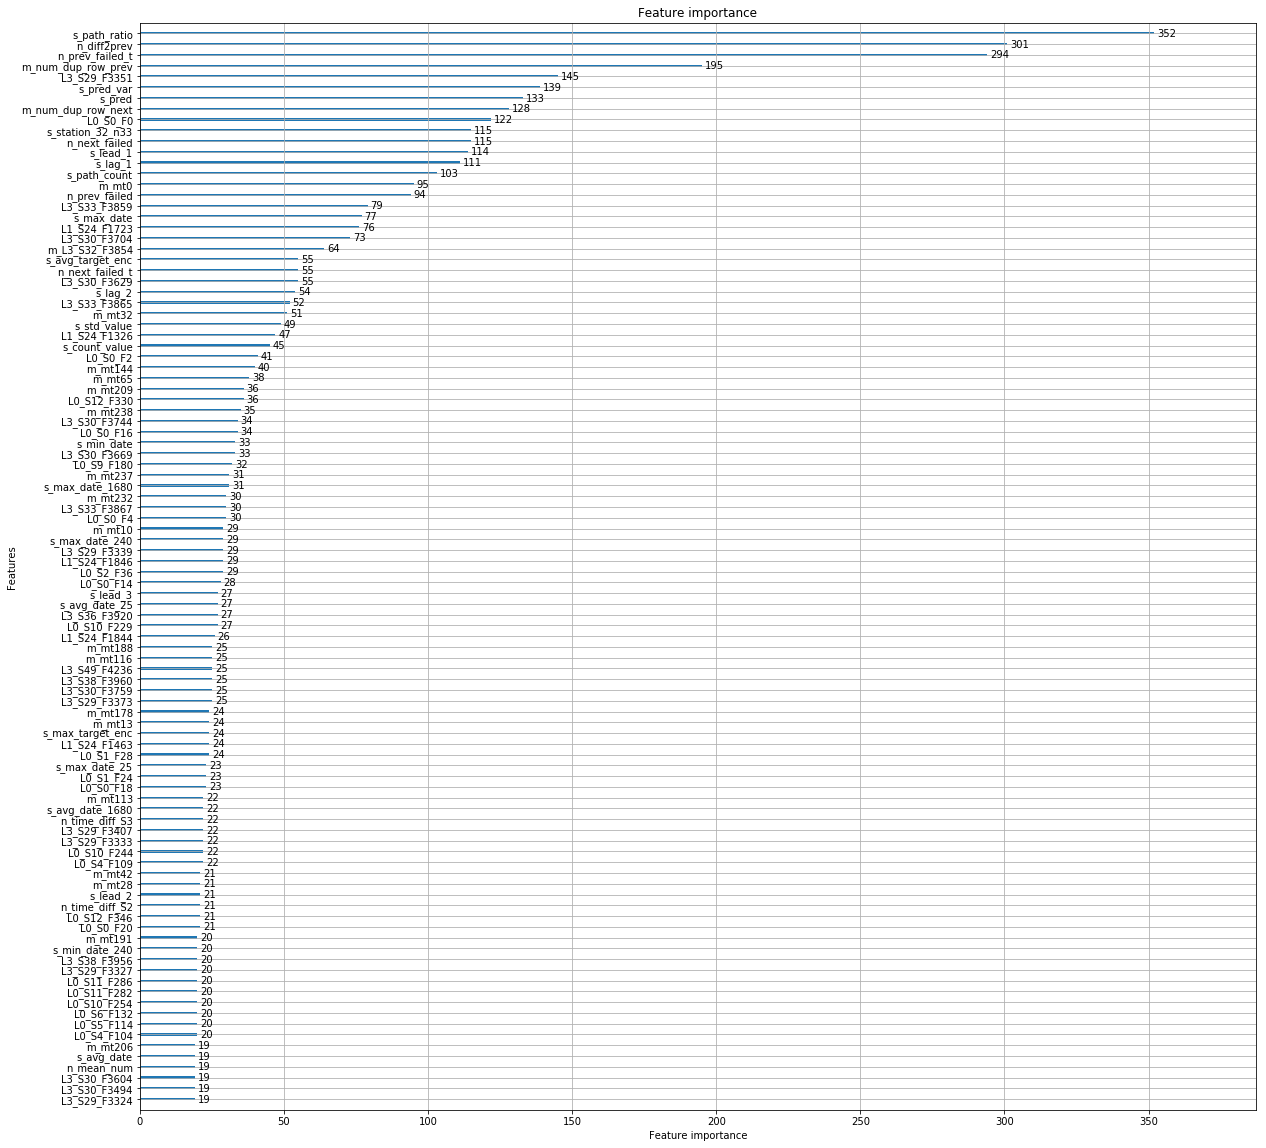

In [80]:
lgb.plot_importance(model, max_num_features=100, figsize=(20,20))

MCC: 0.424748
best_threshold: 0.430000
Wall time: 1min 40s


C:\Users\tmiya\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


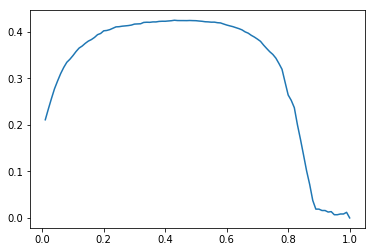

In [81]:
%%time
plt.figure()
thresholds = np.linspace(0.01, 1.00, 100)
mcc = np.array([metrics.matthews_corrcoef(y, preds_oof>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
best_threshold = thresholds[mcc.argmax()]
print("MCC: %f" % mcc.max())
print("best_threshold: %f" % best_threshold)

In [82]:
preds = (preds_test.mean(axis=0) > best_threshold).astype(np.int8)
sub = pd.read_csv("../input/sample_submission.csv", index_col=0)
sub["Response"] = preds
sub.to_csv("submission.csv.gz", compression="gzip")

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


以下はデバッグ用

In [76]:
df_pred = pd.DataFrame(data={"Id":y.index, "Response":preds_oof})

In [77]:
df_pred = df_pred.set_index("Id")

In [78]:
df_pred.to_csv("pred_train.csv.gz", compression="gzip")

In [42]:
models[0].feature_importance()

array([139,  82,  38,  29,  18,  18,  47,  27,  39,  60,  33,   8,  32,
        16,   8,  35,   3,  16,  15,  13,  13,  33,  31,  15,  18,  19,
         4,   2,  17,  11,  23,  44,  18,  10,  10,  21,  14,   2,  43,
        14,  16,   7,  15,  24,  16,  22,   9,  29,  37,  50,  12,  31,
        12,  18,   5,   8,  12,  22,  32,  20,   9,   9,   4,  23,  15,
        10,   9,   2,  11,  11,   9,   3,  17,   9,   6,   6,  19,  13,
         5,   3,   7,   1,   1,   1,  12,   3,  13,   6,   5,   7,   4,
         1,  12,   6,   2,  12,  44,   2,   7,  20,  22,  15,  12,  11,
        10,   2,  29,   6,  10,  11,   3,   1,  11,   6,   2,  76,  17,
         2,   4,   4,  10,  13,   5,   3,  10,   2,  42,  16,   4,  13,
        17,  10,  19,  13,   5,   5,   0,   3,   3,   6,   7,   1,   3,
         0,   1,   0,   1,   2,   0,   3,   2,   3,   0,   2,   4,  13,
         7,  15,  17,  15,   4,  10,   6,  15,   8,   2,   7,  12,   2,
         9,   5,   2,   3,  18,  13,  20,  14,  26,  13,  31,  4